In [3]:
# ev centrality, deg centrality, cred score, toxicity score to be considered for users
import pandas as pd

In [46]:
tweets = pd.read_csv("./Tweets/result_cred_score_thresh_20.csv")

In [47]:
user_ev = pd.read_csv("./Files/user_ev_centrality.csv")

In [48]:
tweets = tweets.merge(user_ev, left_on="user_screen_name", right_on="name", how="left")

In [49]:
tweets.sort_values(by='ev', ascending=False, inplace=True)

In [50]:
tweets = tweets[tweets["ev"].notna()]

In [51]:
tweets.head(20)

,Unnamed: 0,user_screen_name,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score,name,ev
2553,2553,valy_s,97,63,7,21,6,0.10,valy_s,0.096610
1845,1845,MinervaMcGrani1,393,167,101,101,24,0.38,MinervaMcGrani1,0.093662
677,677,noitre32,566,179,327,50,10,0.65,noitre32,0.091744
532,532,a_meluzzi,433,110,255,58,10,0.70,a_meluzzi,0.088043
1589,1589,BarbaraRaval,254,55,44,126,29,0.44,BarbaraRaval,0.088029
167,167,ImolaOggi,754,8,731,14,1,0.99,ImolaOggi,0.082917
1525,1525,miia_2018,208,37,31,129,11,0.46,miia_2018,0.082818
946,946,pbecchi,38,11,15,7,5,0.58,pbecchi,0.081568
2086,2086,ladyonorato,59,29,12,14,4,0.29,ladyonorato,0.081234
2657,2657,cris_cersei,56,36,3,16,1,0.08,cris_cersei,0.079670


In [52]:
import numpy as np
threshold_high_low = 20
tweets = tweets[tweets['number_of_urls']>=threshold_high_low]
tweets['conspiracy_score'] = np.around(((tweets['LOW'])/(tweets['HIGH']+tweets['LOW'])),2)
tweets=tweets.sort_values(by=['conspiracy_score'], ascending=False)
tweets.head(10)

,Unnamed: 0,user_screen_name,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score,name,ev
57,57,Augusto00213634,179,0,2,169,8,1.0,Augusto00213634,1.103783e-02
160,160,Novanews242,3307,1,3284,7,15,1.0,Novanews242,5.571849e-04
157,157,BlogNews_it,752,0,752,0,0,1.0,BlogNews_it,2.537999e-07
134,134,contro_informa,27,0,27,0,0,1.0,contro_informa,6.399593e-04
164,164,zazoomblog,6033,0,6024,9,0,1.0,zazoomblog,6.366897e-04
120,120,Eleonora7711,30,0,12,14,4,1.0,Eleonora7711,6.342796e-04
96,96,ActiveNewsRo,20,0,20,0,0,1.0,ActiveNewsRo,1.156756e-07
152,152,ilmeteoit,506,0,506,0,0,1.0,ilmeteoit,6.209002e-04
6,6,Ashdracs,70,0,4,66,0,1.0,Ashdracs,8.398319e-08
100,100,MeteoWeb_eu,20,0,20,0,0,1.0,MeteoWeb_eu,1.268209e-04


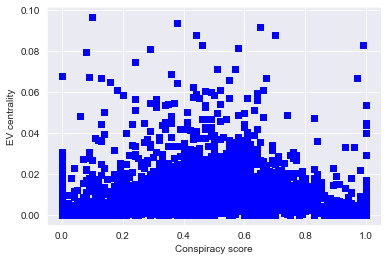

In [57]:
import matplotlib.pyplot as plt
plt.scatter(list(tweets["conspiracy_score"]), list(tweets["ev"]), c ="blue", marker ="s",)
plt.xlabel("Conspiracy score")
plt.ylabel("EV centrality")
plt.show()